In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [37]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [38]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [39]:
dataset = pd.DataFrame(df)

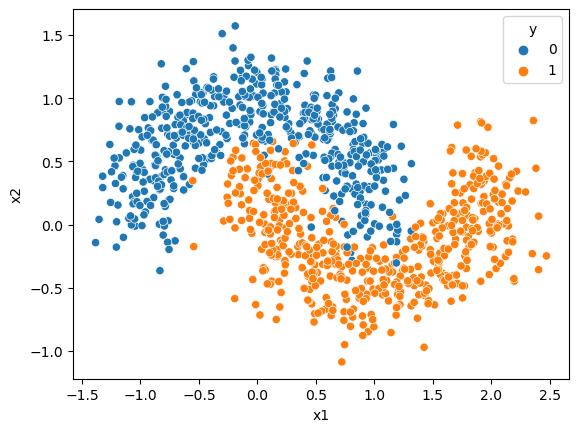

In [40]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [41]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [59]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,  dt.score(x_test,y_test)*100

(100.0, 96.0)

In [60]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100  ,  sv.score(x_test,y_test)*100

(96.125, 98.0)

In [61]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100  ,  gnb.score(x_test,y_test)*100

(85.25, 90.5)

In [62]:
from sklearn.ensemble import VotingClassifier

In [63]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [64]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [65]:
vc.score(x_train, y_train)*100 , vc.score(x_test,y_test)*100

(96.625, 97.0)

In [74]:
prd = {"dt":dt.predict(x_test),"sv":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [75]:
pd.DataFrame(prd)

,dt,sv,gnb,vc
0,1,1,0,1
1,0,0,0,0
2,1,1,0,1
3,1,1,1,1
4,1,1,0,1
...,...,...,...,...
195,0,0,0,0
196,1,1,1,1
197,1,1,1,1
198,1,1,1,1
